## 경매 데이터 탐색적 데이터 분석 (EDA)

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 파일 경로 설정
data_dir = '/Users/eoseungyun/Desktop/학교/3-2/데캡디/모델링/Modeling/Auction/Data'
file_path = os.path.join(data_dir, 'auction_preprocessed.csv')

# 데이터 불러오기
df = pd.read_csv(file_path)

print(f"데이터 로드 완료. 총 {len(df)}개 데이터")

# --- 데이터 전처리 추가 ---
# 분석에 사용할 숫자 컬럼들
numeric_cols_to_clean = ['minprice', 'winprice', 'landarea', 'aptarea', 'floor']

print("\n숫자 컬럼을 전처리합니다...")
for col in numeric_cols_to_clean:
    # 쉼표(,) 제거 및 숫자로 변환. 변환할 수 없는 값은 NaN으로 처리
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
 
# winprice가 유효하지 않은 행(NaN)은 분석에서 제외
df.dropna(subset=['winprice'], inplace=True)

# 건축년도, 본번, 부번 등도 숫자형으로 변환
numeric_cols_to_convert = ['year', 'month', '본번', '부번', '건축년도', '법정동코드']
for col in numeric_cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

print("전처리 완료. 유효 데이터:", len(df))
df.head()

데이터 로드 완료. 총 723개 데이터

숫자 컬럼을 전처리합니다...
전처리 완료. 유효 데이터: 305


,location,landarea,aptarea,minprice,winprice,result,time,year,month,시군구,번지,이외,본번,부번,법정동코드,건축년도,floor
0,서울특별시 성동구 옥수동 428 8동 2층 210호 아파트,33.840,57.780,9.550000e+08,1.006113e+09,낙찰,2020-12-01 10:00:00,2020,12,서울특별시 성동구 옥수동,428,8동 2층 210호 아파트,428,0,1.120011e+09,1986.0,2
1,서울특별시 은평구 갈현동 468-4 1402호 아파트,20.151,55.700,3.500000e+08,3.500100e+08,낙찰,2020-11-23 10:00:00,2020,11,서울특별시 은평구 갈현동,468-4,1402호 아파트,468,4,1.138010e+09,2019.0,14
2,서울특별시 은평구 갈현동 468-4 1202호 아파트,20.151,55.700,3.450000e+08,3.450200e+08,낙찰,2020-11-23 10:00:00,2020,11,서울특별시 은평구 갈현동,468-4,1202호 아파트,468,4,1.138010e+09,2019.0,12
3,서울특별시 도봉구 도봉동 87 4동 1310호 아파트,0.000,73.890,4.875000e+08,5.650000e+08,낙찰,2020-11-11 14:00:00,2020,11,서울특별시 도봉구 도봉동,87,4동 1310호 아파트,87,0,1.132011e+09,1987.0,13
4,서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제14층 제1402호 아파트,30.680,95.566,1.370800e+09,1.370800e+09,낙찰,2020-10-13 09:00:00,2020,10,서울특별시 강남구 삼성동,3-1,삼성월드타워 아파트 제14층 제1402호 아파트,3,1,1.168010e+09,1997.0,14


## 1. 기본 통계량 확인
주요 숫자형 데이터의 분포를 확인합니다. (평균, 표준편차, 최소/최대값 등)

In [7]:
# 유효한 숫자형 데이터만 선택
numeric_cols = ['minprice', 'winprice', 'landarea', 'aptarea', 'year', 'month', '본번', '부번', '건축년도']
df[numeric_cols].describe()

,minprice,winprice,landarea,aptarea,year,month,본번,부번,건축년도
count,1.110000e+02,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,9.844889e+08,9.964574e+08,697.577053,129.971104,2020.810811,7.036036,379.567568,1.270270,1966.099099
std,1.005444e+09,1.004233e+09,6561.997216,323.136839,1.296944,3.193539,473.372727,2.766507,267.674937
min,1.885760e+08,1.939874e+08,0.000000,45.110000,2020.000000,1.000000,3.000000,0.000000,0.000000
25%,6.000000e+08,6.247500e+08,0.000000,66.987000,2020.000000,4.000000,3.000000,0.000000,1997.000000
50%,8.511000e+08,8.511000e+08,20.459000,84.918400,2020.000000,7.000000,88.000000,1.000000,1997.000000
75%,1.223050e+09,1.226800e+09,30.810000,96.552000,2021.000000,10.000000,737.500000,1.000000,2008.000000
max,1.050000e+10,1.050000e+10,68996.200000,3434.049200,2024.000000,12.000000,1743.000000,22.000000,2023.000000


### 분석
- `winprice` (낙찰가)와 `minprice` (최저가)의 편차가 매우 큰 것을 볼 수 있습니다. 이는 일부 매우 비싼 아파트(이상치)가 포함되어 있음을 시사합니다.
- `건축년도`의 평균은 약 2004년이지만, 최소값(1971)과 최대값(2023)의 범위가 넓습니다.

## 2. 상관관계 분석
낙찰가(`winprice`)와 다른 숫자형 특성들 간의 상관관계를 확인하여 어떤 특성이 가격 예측에 중요한지 알아봅니다.

In [8]:
# 상관관계 행렬 계산
correlation_matrix = df[numeric_cols].corr()

# 낙찰가와의 상관관계만 따로 확인
winprice_corr = correlation_matrix['winprice'].sort_values(ascending=False)
print(winprice_corr)

winprice    1.000000
minprice    0.999514
aptarea     0.930981
year        0.147742
부번          0.025532
landarea    0.012255
month      -0.042698
본번         -0.227504
건축년도       -0.667931
Name: winprice, dtype: float64


## 3. 범주형 데이터 탐색

### 3.1. 연도별 데이터 분포

In [9]:
df['year'].value_counts().sort_index()

2020    69
2021    21
2022     3
2023     9
2024     9
Name: year, dtype: int64

### 3.2. 월별 데이터 분포

In [10]:
df['month'].value_counts().sort_index()

1      2
2      9
3      2
4     25
5      5
6      6
7     11
8      2
9      5
10    34
11     4
12     6
Name: month, dtype: int64

/var/folders/jt/kst5n6zs4x19wxxlkzswrhb80000gn/T/ipykernel_83270/2708502290.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


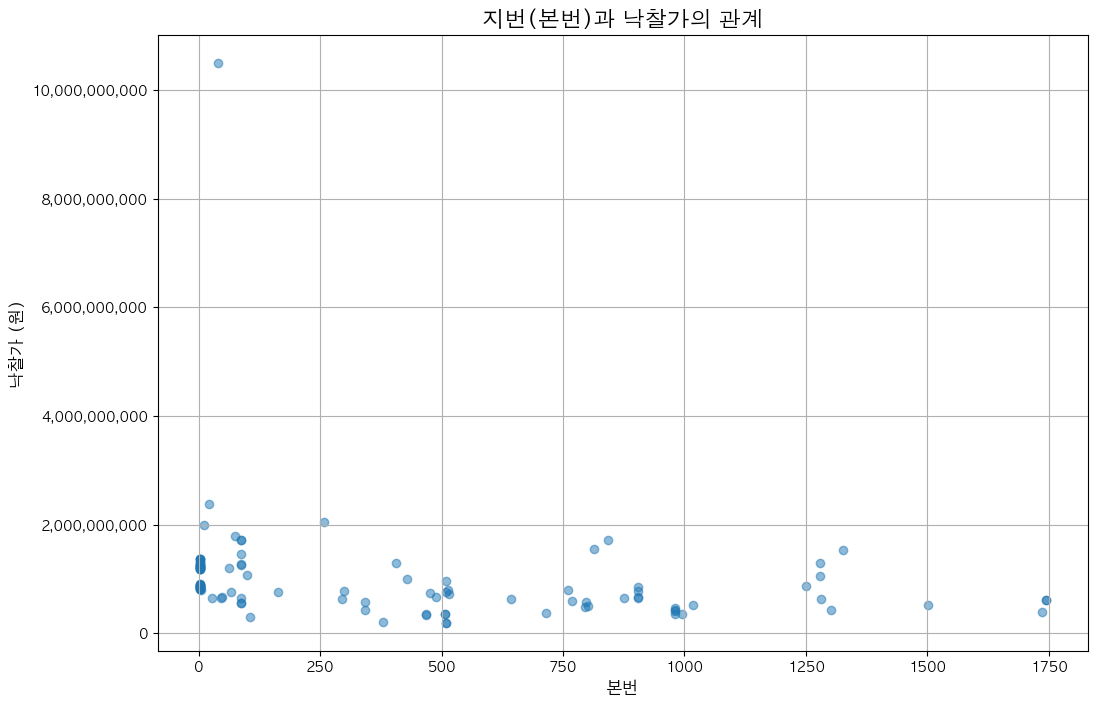

In [13]:
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

plt.figure(figsize=(12, 8))
# 산점도(scatter plot) 생성
plt.scatter(df['본번'], df['winprice'], alpha=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('지번(본번)과 낙찰가의 관계', fontsize=16)
plt.xlabel('본번', fontsize=12)
plt.ylabel('낙찰가 (원)', fontsize=12)

# y축 단위를 더 읽기 쉽게 포맷팅 (예: 1e10 -> 100억)
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.grid(True)
plt.show()

In [14]:
outlier = df.loc[df['winprice'].idxmax()]
print("낙찰가가 가장 높은 데이터 (이상치):")
print(outlier)

낙찰가가 가장 높은 데이터 (이상치):
location    서울특별시 종로구 평창동 39-1 일원 토지 및 미준공건물(공동주택)
landarea                                    1362.0
aptarea                                  3434.0492
minprice                               10500000000
winprice                             10500000000.0
result                                          낙찰
time                           2023-04-18 10:00:00
year                                          2023
month                                            4
시군구                                  서울특별시 종로구 평창동
번지                                            39-1
이외                             일원 토지 및 미준공건물(공동주택)
본번                                              39
부번                                               1
법정동코드                                   1111018300
건축년도                                           0.0
Name: 218, dtype: object


In [15]:
index_to_drop = df['winprice'].idxmax()
df.drop(index_to_drop, inplace=True)

/var/folders/jt/kst5n6zs4x19wxxlkzswrhb80000gn/T/ipykernel_83270/2708502290.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


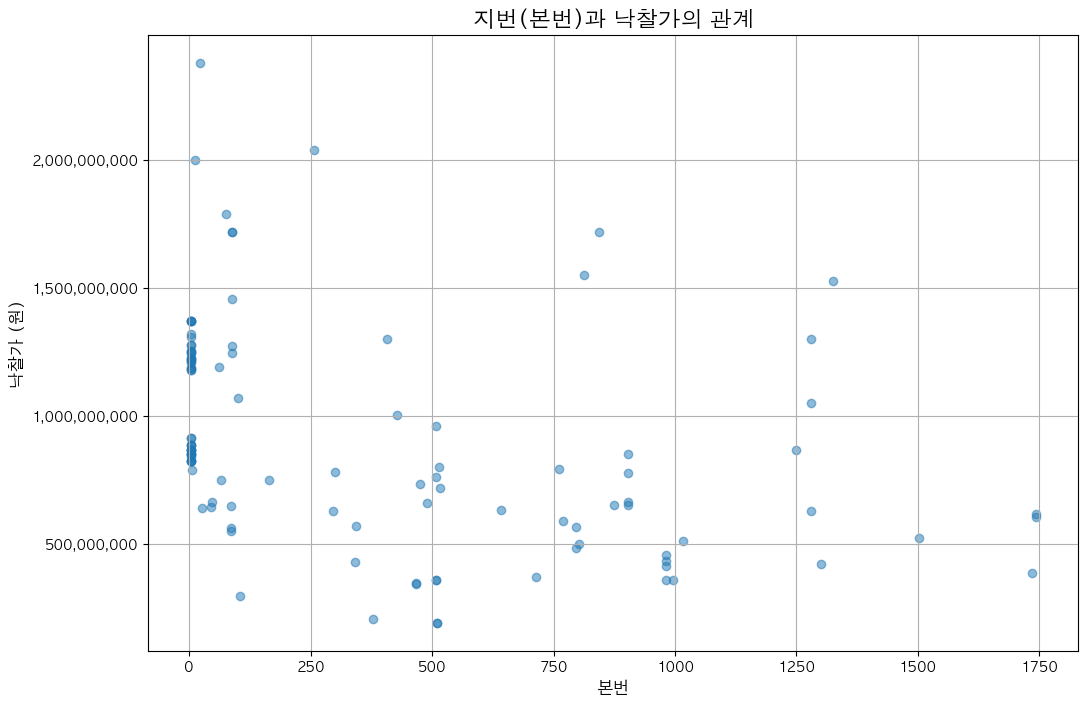

In [16]:
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

plt.figure(figsize=(12, 8))
# 산점도(scatter plot) 생성
plt.scatter(df['본번'], df['winprice'], alpha=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('지번(본번)과 낙찰가의 관계', fontsize=16)
plt.xlabel('본번', fontsize=12)
plt.ylabel('낙찰가 (원)', fontsize=12)

# y축 단위를 더 읽기 쉽게 포맷팅 (예: 1e10 -> 100억)
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.grid(True)
plt.show()

0~250만 보기


                                          location            시군구   번지  본번      winprice
5   서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제14층 제1402호 아파트  서울특별시 강남구 삼성동  3-1   3  1.370800e+09
6   서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제13층 제1301호 아파트  서울특별시 강남구 삼성동  3-1   3  1.370800e+09
7   서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제12층 제1202호 아파트  서울특별시 강남구 삼성동  3-1   3  1.370800e+09
8   서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제12층 제1201호 아파트  서울특별시 강남구 삼성동  3-1   3  1.370800e+09
9   서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제11층 제1104호 아파트  서울특별시 강남구 삼성동  3-1   3  9.152000e+08
10  서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제11층 제1103호 아파트  서울특별시 강남구 삼성동  3-1   3  9.152000e+08
11  서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제11층 제1102호 아파트  서울특별시 강남구 삼성동  3-1   3  1.311000e+09
12  서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제11층 제1101호 아파트  서울특별시 강남구 삼성동  3-1   3  1.319200e+09
13  서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제10층 제1001호 아파트  서울특별시 강남구 삼성동  3-1   3  1.279600e+09
14    서울특별시 강남구 삼성동 3-1번지 삼성월드타워 아파트 제9층 제903호 아파트  서울특별시 강남구 삼성동  3-1   3  8.877000e+08
15    서울특별시 강남구 삼성동 3

/var/folders/jt/kst5n6zs4x19wxxlkzswrhb80000gn/T/ipykernel_83270/3897927552.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


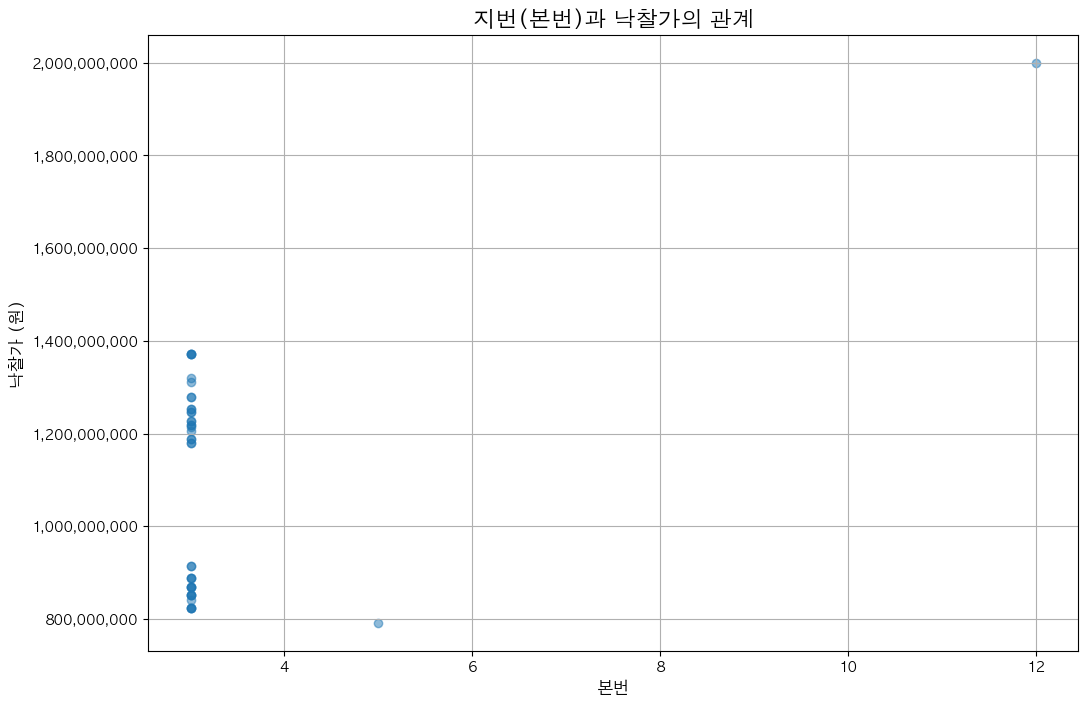

In [20]:
filtered_df = df[(df['본번'] >= 0) & (df['본번'] <= 20)]
print(filtered_df[['location', '시군구', '번지', '본번', 'winprice']].head(20).to_string())

font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

plt.figure(figsize=(12, 8))
# 산점도(scatter plot) 생성
plt.scatter(filtered_df['본번'], filtered_df['winprice'], alpha=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('지번(본번)과 낙찰가의 관계', fontsize=16)
plt.xlabel('본번', fontsize=12)
plt.ylabel('낙찰가 (원)', fontsize=12)

# y축 단위를 더 읽기 쉽게 포맷팅 (예: 1e10 -> 100억)
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.grid(True)
plt.show()

In [6]:
Q1 = df['winprice'].quantile(0.25)
Q3 = df['winprice'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['winprice'] < lower_bound) | (df['winprice'] > upper_bound)]


outliers = outliers.sort_values(by='winprice', ascending=False)
print(len(outliers))
outliers.head()


27


,location,landarea,aptarea,minprice,winprice,result,time,year,month,시군구,번지,이외,본번,부번,법정동코드,건축년도,floor,winprice_in_eok
253,광주광역시 동구 궁동 63 한신더펜트하우스(101동401호 외 60개호) 아파트,0.000,100.0000,4.776200e+10,5.140900e+10,낙찰,2024-10-10 11:10:00,2024,10,광주광역시 동구 궁동,63,한신더펜트하우스(101동401호 외 60개호) 아파트,63,0,2.911011e+09,0.0,4,514.09000
54,서울특별시 종로구 평창동 39-1 일원 토지 및 미준공건물(공동주택),1362.000,3434.0492,1.050000e+10,1.050000e+10,낙찰,2023-04-18 10:00:00,2023,4,서울특별시 종로구 평창동,39-1,일원 토지 및 미준공건물(공동주택),39,1,1.111018e+09,0.0,0,105.00000
251,광주광역시 동구 궁동 63 101동 502호외 11개호 아파트,0.000,1153.5000,9.101000e+09,1.010000e+10,낙찰,2024-10-28 14:10:00,2024,10,광주광역시 동구 궁동,63,101동 502호외 11개호 아파트,63,0,2.911011e+09,0.0,5,101.00000
102,경기도 평택시 포승읍 석정리 산 60-5 외 3필지 평택늘사랑아파트 아파트,21569.565,21569.5650,8.593000e+09,8.593000e+09,낙찰,2021-11-29 10:10:00,2021,11,경기도 평택시,60-5,외 3필지 평택늘사랑아파트 아파트,60,5,4.122000e+09,0.0,0,85.93000
51,서울특별시 용산구 이태원동 22-2 제6동 제1105호 아파트,96.140,174.3800,2.367400e+09,2.380002e+09,낙찰,2023-08-25 09:30:00,2023,8,서울특별시 용산구 이태원동,22-2,제6동 제1105호 아파트,22,2,1.117013e+09,1982.0,11,23.80002


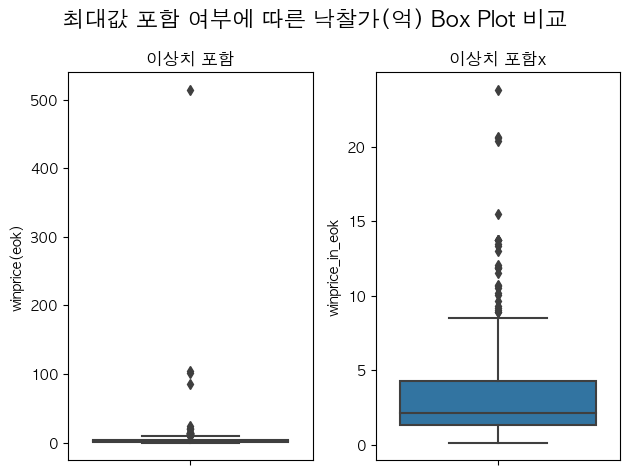

In [5]:
import seaborn as sns
from matplotlib import rc

font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

df['winprice_in_eok'] = df['winprice'] / 1_0000_0000

data_with_max = df['winprice_in_eok']

index_to_drop = df['winprice_in_eok'].nlargest(4).index                                                                                                                       
data_without_max = df.drop(index_to_drop)['winprice_in_eok']

fig, axes = plt.subplots(1,2)
sns.boxplot(y=data_with_max, ax=axes[0])
axes[0].set_title('이상치 포함')
axes[0].set_ylabel('winprice(eok)')

sns.boxplot(y=data_without_max, ax=axes[1])
axes[1].set_title('이상치 포함x')

fig.suptitle('최대값 포함 여부에 따른 낙찰가(억) Box Plot 비교', fontsize=16)
rc('font', family='AppleGothic')
plt.tight_layout()
plt.show()